# MNIST

### Classifying Handwritten Images

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

#### Goal
The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.
For every in the test set, you should predict the correct label.

#### Metric
This competition is evaluated on the categorization accuracy of your predictions (the percentage of images you get correct).

#### Best results: RMSE of X

#### Imports & loading the data

In [1]:
# Import necessery libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

sns.set_style('darkgrid')

# Ignore jupyter notebook warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Common classification algorithms
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

In [47]:
# Other pre-processing and evaluation tools needed
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE

In [4]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

#### EDA & Pre-processing

In [5]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
y = y.astype(int)
y

array([5, 0, 4, ..., 4, 5, 6])

In [8]:
display(X)
display(y)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([5, 0, 4, ..., 4, 5, 6])

In [9]:
X.min(), X.max()

(0.0, 255.0)

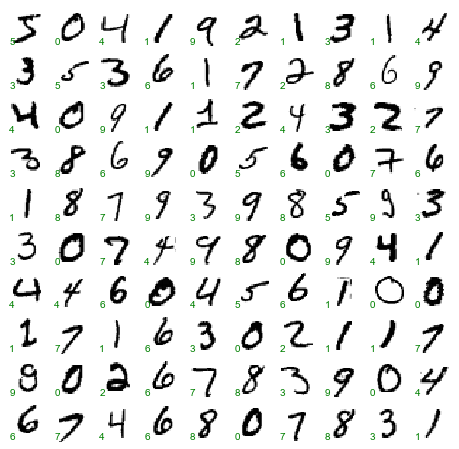

In [10]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28,28), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, y[i], transform=ax.transAxes, color='green')

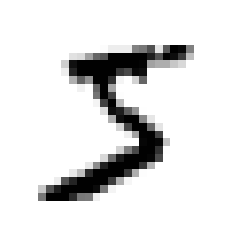

Label: 5


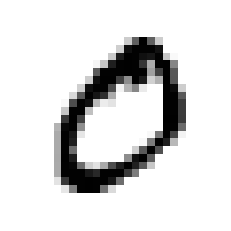

Label: 0


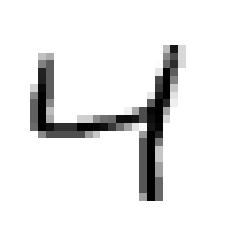

Label: 4


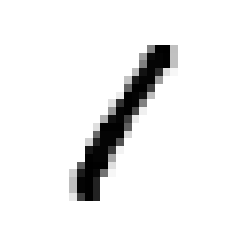

Label: 1


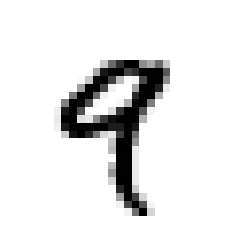

Label: 9


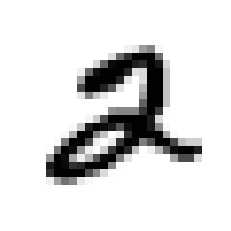

Label: 2


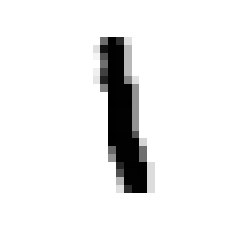

Label: 1


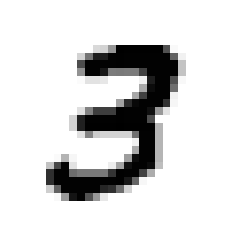

Label: 3


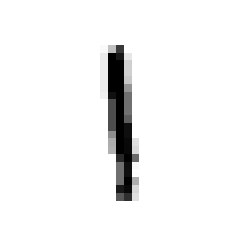

Label: 1


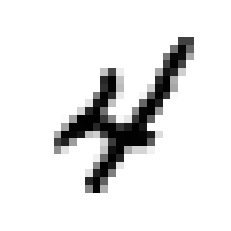

Label: 4


In [11]:
for i in range(10):
    plt.imshow(X[i].reshape(28,28), cmap='binary')
    plt.axis('off')
    plt.show()
    print(f'Label: {y[i]}')

,count,normalized
0,6903,0.098614
1,7877,0.112529
2,6990,0.099857
3,7141,0.102014
4,6824,0.097486
5,6313,0.090186
6,6876,0.098229
7,7293,0.104186
8,6825,0.097500
9,6958,0.099400


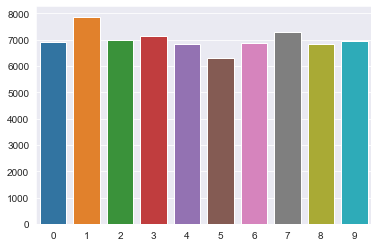

In [12]:
label_counts = pd.concat([pd.DataFrame(pd.Series(y).value_counts().sort_index()), pd.DataFrame(pd.Series(y).value_counts(normalize=True).sort_index())], axis=1)
label_counts.columns = ['count','normalized']
display(label_counts)
sns.barplot(data=label_counts[['count']].transpose());

In [13]:
pd.DataFrame(X).iloc[:,382:402].describe()

,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,109.038929,81.123771,55.259857,37.217043,24.074843,13.673386,5.113371,0.589757,0.074914,0.009314,0.001614,0.007071,0.052714,0.448371,2.996100,12.306214,28.474929,50.643429,73.957614,90.429543
std,111.600531,104.689421,92.994277,80.717406,67.594926,51.872818,31.035452,9.986308,3.422198,1.358759,0.427100,0.956156,2.917509,8.943029,23.400396,47.919157,72.167528,91.871991,104.339272,109.407536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,251.000000,194.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,181.000000,229.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,252.000000,247.000000,113.000000,188.000000,254.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


#### Modelling

In [14]:
X_train = X[:60000]/255
X_test = X[60000:]/255
y_train = y[:60000]
y_test = y[60000:]

In [15]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784)

(10000, 784)

(60000,)

(10000,)

In [16]:
models = [DummyClassifier(), GaussianNB(), KNeighborsClassifier(), LinearSVC(), SVC(), LogisticRegression(), 
          DecisionTreeClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), MLPClassifier()]

In [17]:
model_names = [model.__class__.__name__ for model in models]

In [18]:
train_scores, cv_scores, test_scores = [],[],[]

In [19]:
# print(' Model\n','train_score\n','cv_score\n','test_score\n')
# for model in models:
#     print(model.__class__.__name__)
#     model.fit(X_train,y_train)
#     train_score = accuracy_score(y_train, model.predict(X_train))
#     train_scores.append(train_score)
#     print(train_score)
#     cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1))
#     cv_scores.append(cv_score)
#     print(cv_score)
#     test_score = accuracy_score(y_test, model.predict(X_test))
#     test_scores.append(test_score)
#     print(test_score)

In [20]:
# scores = pd.DataFrame({'model':model_names, 'train_scores':train_scores, 'cv_scores':cv_scores, 'test_scores':test_scores}).set_index('model')
# scores

Some very strong models, with KNN, SVC, RF,XT, MLP all achieving a cross val & test score of over 96% with MLP achieving a whopping 98% accuracy score on the unseen test set. So this out-of-box untuned algorithm misclassifies only 2% of digits, almost as good as you or i!  

In [21]:
pd.read_csv('scores.csv')

,model,train_scores,cv_scores,test_scores
0,DummyClassifier,0.101533,0.100350,0.1023
1,GaussianNB,0.564900,0.561767,0.5558
2,KNeighborsClassifier,0.981917,0.969283,0.9688
3,LinearSVC,0.926283,0.910767,0.9182
4,SVC,0.989917,0.976933,0.9792
5,LogisticRegression,0.935067,0.919700,0.9258
6,DecisionTreeClassifier,1.000000,0.866267,0.8773
7,RandomForestClassifier,1.000000,0.966417,0.9699
8,ExtraTreesClassifier,1.000000,0.968733,0.9729
9,MLPClassifier,1.000000,0.974533,0.9800


In [22]:
#vclf = VotingClassifier([('KNN',KNeighborsClassifier()), ('SVC', SVC()), ('XT',ExtraTreesClassifier()), ('MLP',MLPClassifier())])
#vclf.fit(X_train,y_train)

In [23]:
# print(vclf.estimators_)
# print(vclf.named_estimators_)
# print(vclf.classes_)

In [24]:
# accuracy_score(y_test, vclf.predict(X_test))

In [25]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [26]:
y_pred = mlp.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.9778

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



array([[ 970,    0,    0,    1,    0,    0,    4,    1,    3,    1],
       [   0, 1123,    3,    1,    0,    0,    2,    1,    5,    0],
       [   4,    1, 1005,    4,    3,    0,    3,    3,    8,    1],
       [   0,    0,    3,  992,    0,    4,    0,    4,    2,    5],
       [   0,    0,    2,    0,  959,    1,    6,    2,    1,   11],
       [   2,    1,    0,   10,    3,  865,    5,    1,    4,    1],
       [   4,    2,    1,    0,    2,    6,  940,    0,    3,    0],
       [   1,    6,    9,    1,    2,    0,    1,  998,    3,    7],
       [   5,    0,    3,    7,    3,    3,    5,    2,  944,    2],
       [   2,    2,    0,    5,    6,    4,    0,    3,    5,  982]],
      dtype=int64)

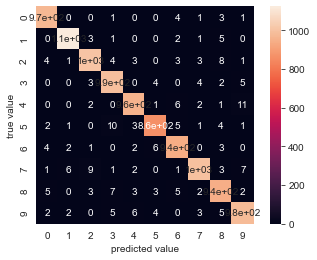

In [29]:
mat = confusion_matrix(y_test, y_pred)
display(mat)
sns.heatmap(mat, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

#### Principal Component Analysis

In [30]:
pca = PCA().fit(X_train)

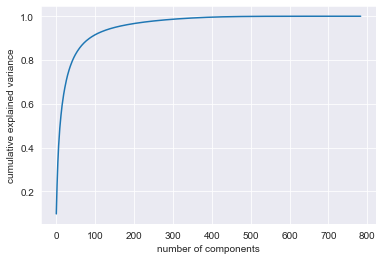

In [31]:
# The first 80 PC's explain roughly 90% of the varience, where the first 300 explain 99%
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [32]:
pca2 = PCA(n_components=2) # project from 784 to 2 dimensions
projected = pca2.fit_transform(X_train[:2000])
print(X_train[:2000].shape)
print(projected.shape)

(2000, 784)
(2000, 2)


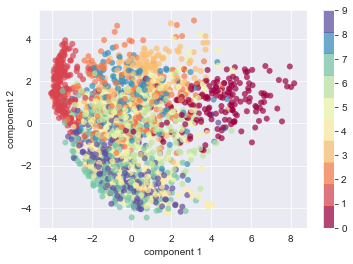

In [33]:
plt.scatter(projected[:, 0], projected[:, 1],c=y_train[:2000], edgecolor='none', alpha=0.7,cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [36]:
kernels = ['linear', 'poly' , 'rbf', 'sigmoid', 'cosine']

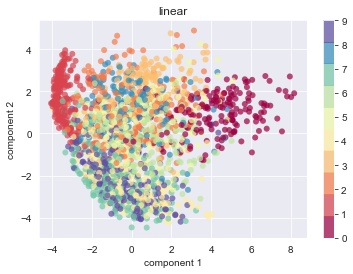

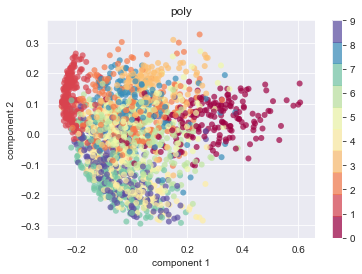

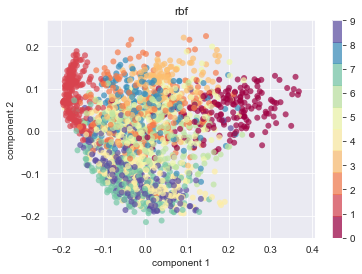

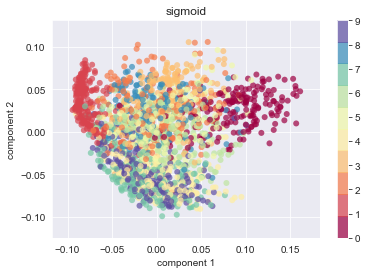

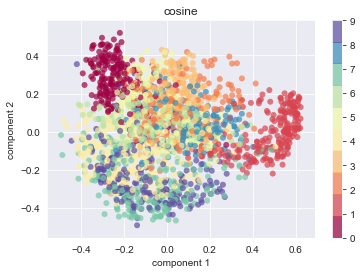

In [37]:
for kernel in kernels:
    proj = KernelPCA(kernel=kernel, n_components=2).fit_transform(X_train[:2000])
    plt.scatter(proj[:, 0], proj[:, 1],c=y_train[:2000], edgecolor='none', alpha=0.7,cmap=plt.cm.get_cmap('Spectral', 10))
    plt.title(kernel)
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar()
    plt.show();

#### Manifold Learning

In [48]:
manifolds = [Isomap(n_components=2), LocallyLinearEmbedding(n_components=2), MDS(n_components=2), 
             SpectralEmbedding(n_components=2), TSNE(n_components=2)]

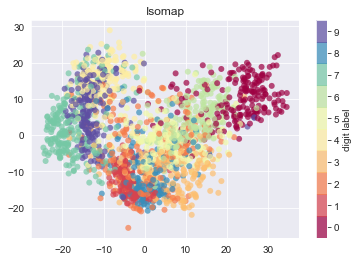

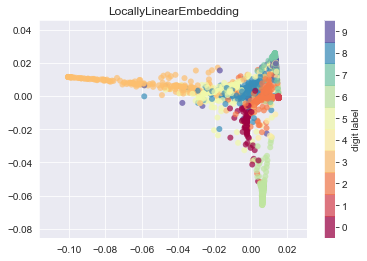

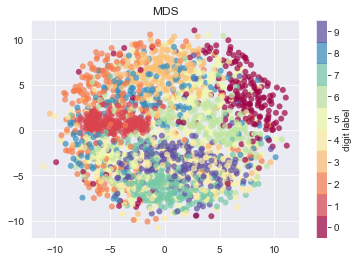

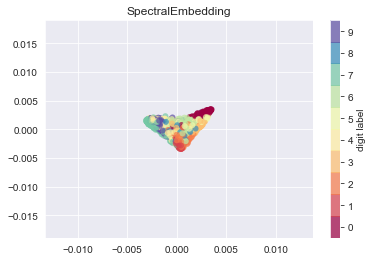

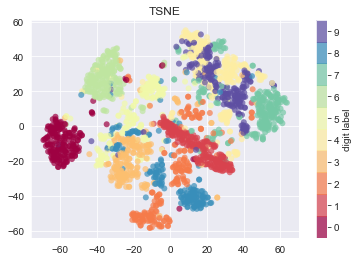

In [54]:
for manifold in manifolds:
    manifold.fit(X_train[:2000])
    projected = manifold.fit_transform(X_train[:2000])
    plt.title(manifold.__class__.__name__)
    plt.scatter(projected[:, 0], projected[:, 1], c=y_train[:2000], edgecolor='none', alpha=0.7, cmap=plt.cm.get_cmap('Spectral', 10))
    plt.colorbar(label='digit label', ticks=range(10))
    plt.clim(-0.5, 9.5)
    plt.show();